# Exploratory Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
from plantclef.config import get_device

print(f"PyTorch Version: {torch.__version__}")
device = get_device()
print(f"Using device: {device}")

PyTorch Version: 2.6.0
Using device: cpu


In [3]:
import pandas as pd
from pathlib import Path

# Get list of stored filed in cloud bucket
root = Path().resolve().parents[0]
print(root)
! date

/Users/mgustineli/github/pytorch-plantclef
Wed Mar 19 11:32:01 EDT 2025


In [4]:
# path to data
data_path = f"{root}/data/parquet/"
train_path = f"{data_path}/subset_top5_train"
test_path = f"{data_path}/test_2025_pytorch_webinar"

# read train data
train_df = pd.read_parquet(train_path)
test_df = pd.read_parquet(test_path)

# schema
print(train_df.shape)
display(train_df.head(3))
display(test_df.head(3))

(3760, 22)


species_id                                    image_name  \
0     1360257  5a4deafc321f2b653f03cc238160a799b0bbb6b7.jpg   
1     1360257  a6d9a13ec26cbb04d61861ad5cb4ede8eb4d1ea3.jpg   
2     1360257  0fec55fc5105e512df08490ecbb55df3393d85c8.jpg   

                                                path  \
0  /PlantCLEF2024/train/1360257/5a4deafc321f2b653...   
1  /PlantCLEF2024/train/1360257/a6d9a13ec26cbb04d...   
2  /PlantCLEF2024/train/1360257/0fec55fc5105e512d...   

                                                data organ      obs_id  \
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1015292920   
1  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  bark  1005087257   
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  leaf  4111721487   

                                          license partner         author  \
0                                        cc-by-sa    None   Gabor Graehn   
1                                        cc-by-sa    None  Jacco Sanders   
2  http://creativecommons.org/licenses/by-nc/4.0/    None         imrsmf   

   altitude  ...  gbif_species_id               species     genus      family  \
0       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
1      51.0  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   
2       NaN  ...        3039454.0  Frangula alnus Mill.  Frangula  Rhamnaceae   

    dataset    publisher                                         references  \
0  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
1  plantnet     plantnet  https://identify.plantnet.org/fr/k-southwester...   
2      gbif  iNaturalist       https://www.inaturalist.org/photos/268971946   

                                                 url learn_tag  \
0  https://bs.plantnet.org/image/o/5a4deafc321f2b...     train   
1  https://bs.plantnet.org/image/o/a6d9a13ec26cbb...     train   
2  https://inaturalist-open-data.s3.amazonaws.com...     train   

                                    image_backup_url  
0  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
1  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  
2  https://lab.plantnet.org/LifeCLEF/PlantCLEF202...  

[3 rows x 22 columns]

image_name  \
0     CBN-PdlC-C4-20180723.jpg   
1  LISAH-BOU-0-30-20230512.jpg   
2     CBN-PdlC-C4-20140811.jpg   

                                                path  \
0  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
1  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   
2  /test/data/PlantCLEF/PlantCLEF2025/DataOut/tes...   

                                                data  
0  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...  
1  b'\xff\xd8\xff\xdb\x00C\x00\x06\x04\x05\x06\x0...  
2  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01...

### looking at some images

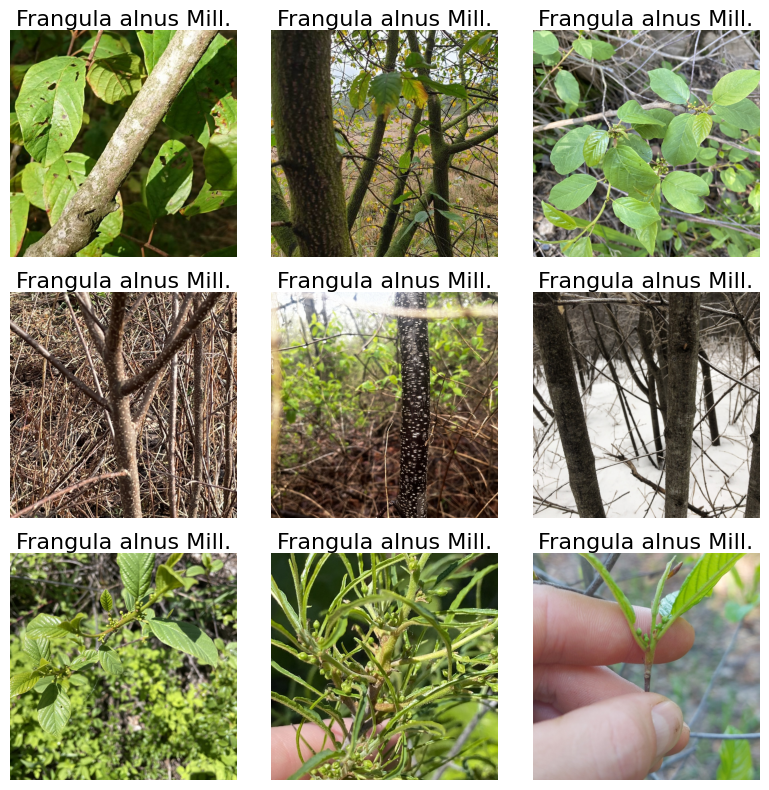

In [5]:
from plantclef.plotting import plot_images_from_binary


plot_images_from_binary(
    train_df,
    data_col="data",
    label_col="species",
    grid_size=(3, 3),
    crop_square=True,
    figsize=(8, 8),
    dpi=100,
)

In [6]:
# interesting test images
images = [
    "CBN-Pyr-03-20230706.jpg",
    "OPTMix-012-P2-207-20231201.jpg",
    "OPTMix-0178-P1-661-20231006.jpg",
    "OPTMix-0333-P2-115-20231212.jpg",
    "OPTMix-0598-P4-104-20231207.jpg",
    "RNNB-1-4-20240117.jpg",
    "RNNB-1-7-20230512.jpg",
    "RNNB-1-8-20230512.jpg",
    "RNNB-4-2-20240118.jpg",
    "RNNB-8-8-20240118.jpg",
    "CBN-can-E6-20230706.jpg",
    "CBN-Pla-A3-20140812.jpg",
]

In [7]:
# select subset of test dataframe
subset_test_df = test_df[test_df["image_name"].isin(images)]
subset_test_df.count()  # 12 images

image_name    12
path          12
data          12
dtype: int64

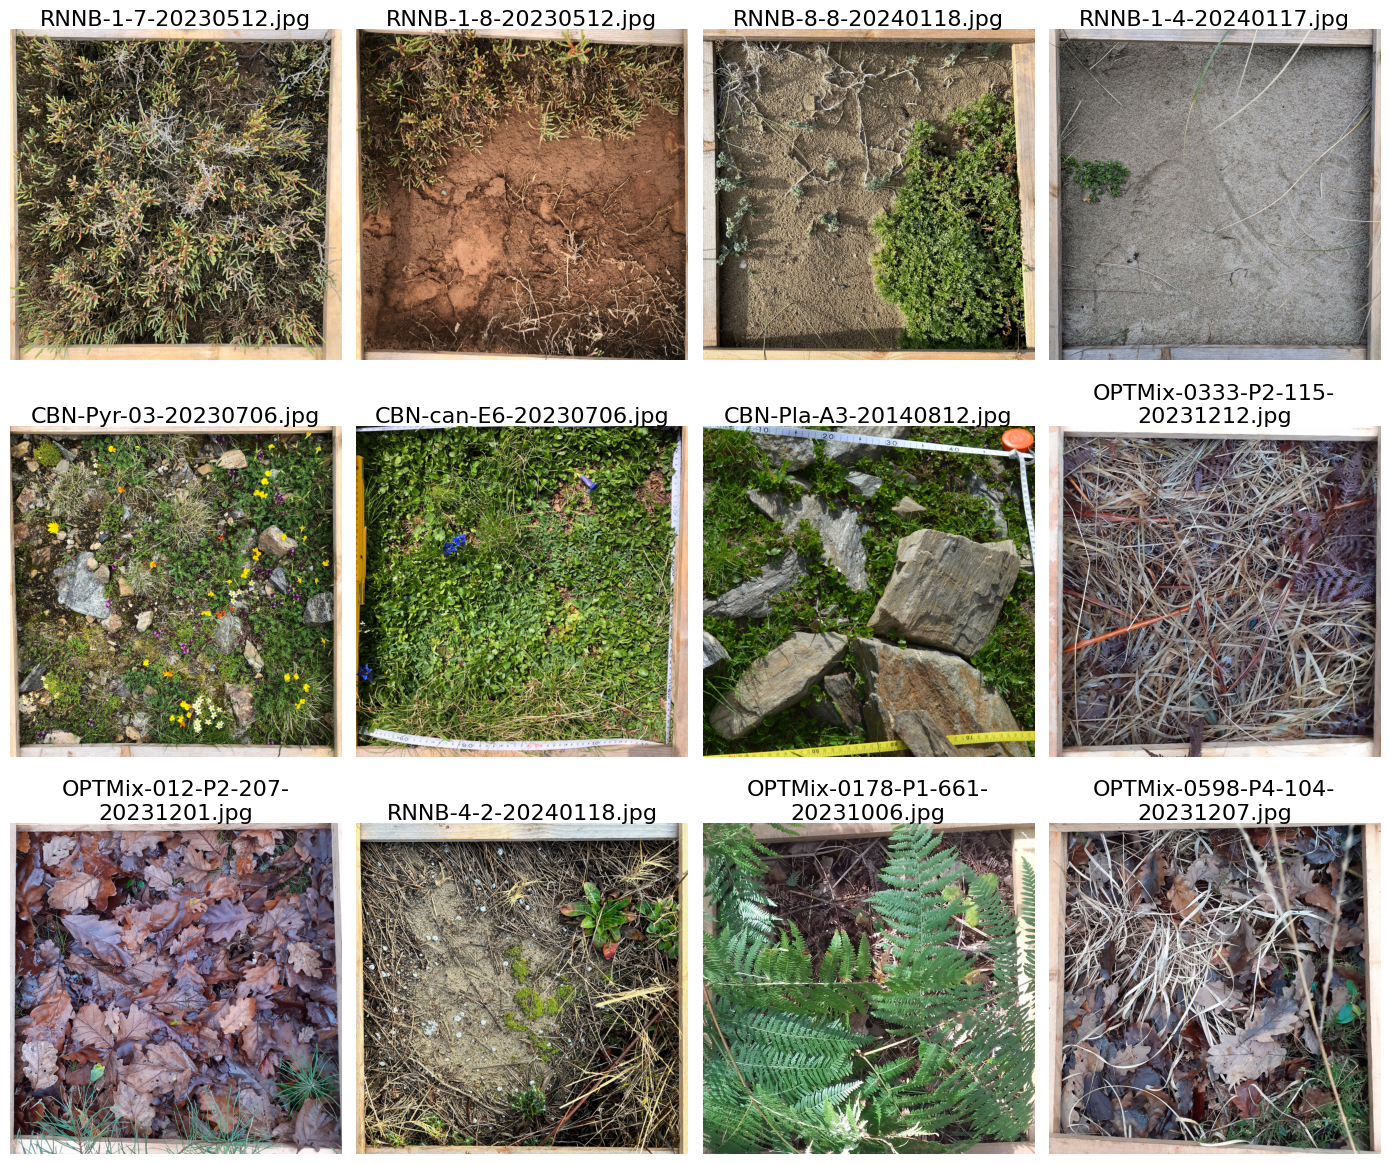

In [8]:
# display the images in a grid with binomial names
plot_images_from_binary(
    subset_test_df,
    data_col="data",
    label_col="image_name",
    grid_size=(3, 4),
    crop_square=True,
    figsize=(14, 12),
    dpi=100,
)

## grid of image tiles

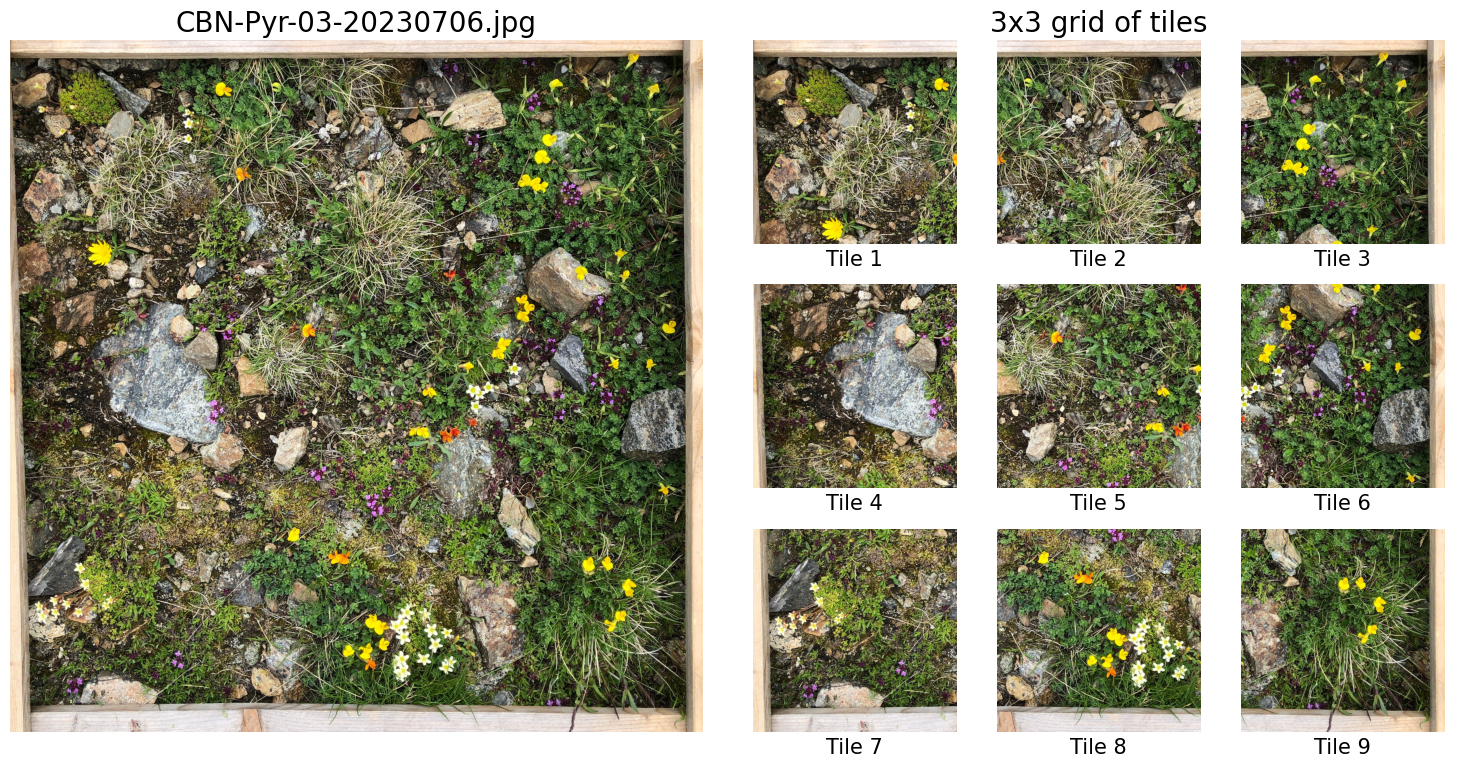

In [9]:
from plantclef.plotting import plot_image_tiles

# select image from test set
image_name = "CBN-Pyr-03-20230706.jpg"
test_image_df = test_df[test_df["image_name"] == image_name]

plot_image_tiles(
    test_image_df,
    data_col="data",
    grid_size=3,
)

In [10]:
test_df.count()

image_name    200
path          200
data          200
dtype: int64